In [12]:
import pandas as pd
from sklearn.metrics import f1_score
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

### This article provides the python code used to underpin the content and visualizations in our Evalutating Classifiers article: 

In [392]:
# num datapoints
start = 20
n = 50 + 20
feature = 3

In [393]:
# load our data
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = pd.DataFrame(data['data'][start:n])[[feature]], pd.DataFrame({'y': data['target'][start:n]})
print(X.shape)

targets = data.target_names

(50, 1)


In [394]:
# # print(data.DESCR)
#     :Attribute Information:
#         - radius (mean of distances from center to points on the perimeter)
#         - texture (standard deviation of gray-scale values)
#         - perimeter
#         - area  **
#         - smoothness (local variation in radius lengths)
#         - compactness (perimeter^2 / area - 1.0)
#         - concavity (severity of concave portions of the contour)
#         - concave points (number of concave portions of the contour)
#         - symmetry **
#         - fractal dimension ("coastline approximation" - 1)


In [395]:
# sns.pairplot(pd.DataFrame(X))

<AxesSubplot:xlabel='3', ylabel='3'>

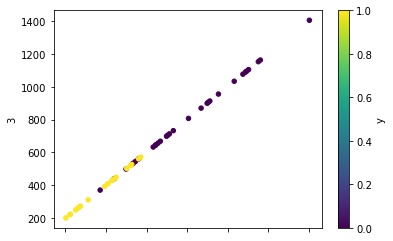

In [396]:
# concat X and y into single dataframe for plotting (so we can find best relationship for visual scatter)
df = pd.concat([X, y], axis=1)
df.plot.scatter(x=feature, y=feature, c='y', colormap='viridis')

In [397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [398]:
# Let's check imbalances in our data
print(f"Class imbalance: {str(y[y==0].dropna().shape[0] / y.shape[0])}")
y.value_counts()

Class imbalance: 0.62


y
0    31
1    19
dtype: int64

In [405]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_model = LogisticRegression()
log_model.fit(X_train, y_train.values.ravel())
# y_pred_log = log_model.predict(X_test)
# y_pred = clf.predict(X_test)  # default threshold is 0.5
y_pred_log = (log_model.predict_proba(X_test)[:,1] >= 0.95).astype(bool) 

Accuracy

In [406]:
from sklearn.metrics import accuracy_score
log_score = accuracy_score(y_test, y_pred_log)

print("Accuracy score (Logistic): ", log_score)

Accuracy score (Logistic):  0.8571428571428571


In [407]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_log)

array([[19,  3],
       [ 2, 11]])

In [388]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log, target_names=targets))  # logistic classification report

              precision    recall  f1-score   support

   malignant       0.63      1.00      0.77        22
      benign       0.00      0.00      0.00        13

    accuracy                           0.63        35
   macro avg       0.31      0.50      0.39        35
weighted avg       0.40      0.63      0.49        35



/Users/wilberjw/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


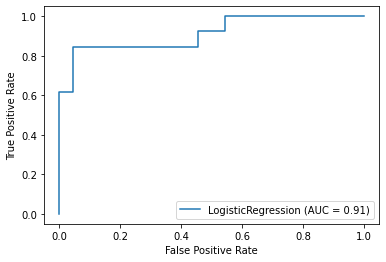

In [389]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model, X_test, y_test)